<a href="https://colab.research.google.com/github/TytanMikJas/DeepLearningJourney/blob/main/My_first_ANN_regression_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### My first Neural Network created thanks to a course by Mike X Cohen, sincxpress.com

In [ ]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from IPython import display
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Function for creating data for experiment

The x value comes from normal distribution

the y value comes from x value parametrized by a slope + normal distribution diveded by 2

In [ ]:
def createData(m: float):
    N = 50
    x = torch.randn(N,1)
    y = m * x + torch.randn(N,1)/2
    return x, y

Function for building and Training ANN with 2 linear units and sigmoid as activation function

In [ ]:
def buildAndTrain(x, y):
    # build model
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input layer
        nn.Sigmoid(),    # activation function
        nn.Linear(1,1)   # output layer
    )

    numepochs = 500
    losses = torch.zeros(numepochs)
    learningRate = 0.05

    # loss function and optimizer (the flavor of gradient descent to implement)
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

    ## Train the model!
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi]= loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final forward pass
    predictions = ANNreg(x)

    return predictions, losses

Carrying out the experiment for 21 different slopes for y (predicted) values.
For each of the slope the experiment is being carried out 50 times.

In [ ]:
# model parameters
slopes = torch.linspace(-2, 2, 21)
numExps = 50

results = np.zeros((len(slopes), numExps, 2))

for slope_idx, slope in enumerate(slopes):

    for exp_idx in range(numExps):

        x, y = createData(slope)
        yHat, losses = buildAndTrain(x, y)

        results[slope_idx, exp_idx, 0] = losses[-1]
        results[slope_idx, exp_idx, 1] = np.corrcoef(y.T, yHat.detach().T)[0,1]

results[np.isnan(results)] = 0

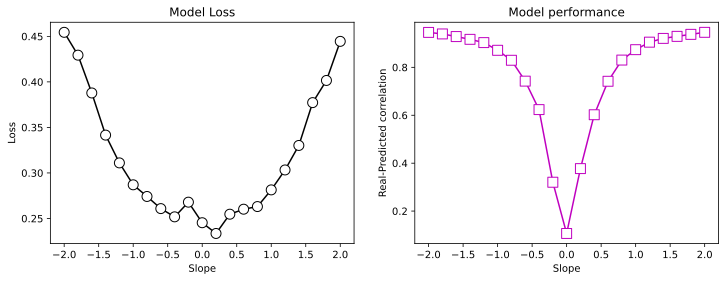

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(slopes.detach(), np.mean(results[:,:,0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(slopes.detach(), np.mean(results[:,:,1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-Predicted correlation')
ax[1].set_title('Model performance')

plt.show()

#The conclusion of this experiment

My experiment shows, that the model performs poorly when the slope gets closer to zero. The slope parameter is manipulating the values on y-axis, which are dependent on the values from:  (x-axis * slope) + number from random-normal-distribution.

Because the x-axis is manipulated by the slope, at value 0 the only numbers we can outline at y-axis are the one from random-normal-distribution. It's transparent that the model cannot perform well for such parameter, because it is trying to predict randomess.